<br>

<center><img src="https://www.htu.edu.jo/images/ThumbnailsCoverPhotos/HTU%20Logo-250px.png" alt="HTU"  width="180px" align="center">

<br>
<p>
School of Computing and Informatics <br>
Artificial Intelligence & Intelligent Systems<br>
<br>
Regression
</p></center>

### By the end of this lab, students will be able to:

- Import and explore a dataset in Python.
- Preprocess and split data for machine learning.
- Implement a simple linear regression model using sklearn.
- Evaluate the regression model’s performance using relevant metrics.
- Visualize and interpret the results.

---
**Dataset Description: Boston Housing**

This dataset includes various features related to housing conditions in Boston suburbs. The goal is to predict the Value of Homes based on different socio-economic and structural factors.

 **Features:**

crime_rate:crime rate by town.

land_zoned: Proportion of residential land zoned for large lots

busines_in_TownS: Proportion of non-retail business acres per town.

River_dummy: 1 if the tract borders the Charles River; 0 otherwise.

average_number_of_rooms: Average number of rooms.

AGE: Proportion of owner-occupied units built before 1940.

distances_to_Boston_center: Weighted distances to five Boston employment centers.

highways: Index of accessibility to radial highways.

TAX: Full-value property tax rate per $10,000.

Teacher_Ratio: teacher ratio by town.

Black_population_index:the proportion of Black residents.

Lower_Status_of_the_Population: Percentage of the population considered lower status.

🎯 **Target:**

Value_of_Homes: Median value of owner-occupied homes.


---


# **Answer the following questions breifley**

- What is scikit-learn? And why do we use it? its a machine learning library that we use to create machine learning algorithms

- What does the function “train_test_split” do? it splits the data into 2 sets, the training set where the machine learning is going to learn, and the testing set where we are going to examine its accuracy

- What does the function “fit” do? it trains the model with the data

- What does the function “predict” do? we can use it to predict new values not in our data.

- What does the function “LinearRegression()” do? its used to initialize the model

- What does “StandardScaler” do? it standarize the data

# <h1><font color='red'> Part1: Simple Linear Regression</font></h1>

---



Task 1: Import Required Libraries

Import the required libraries for data handling, visualization, and linear regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Task 2: Load and Explore the Dataset
Load the dataset and display the first few rows to understand the structure.

In [2]:
df = pd.read_csv("Boston-house-price-data.csv")
df

,crime_rate,land zoned,busines_in_TownS,River_dummy,average number of rooms,AGE,distances to Boston center,highways,TAX,Teacher Ratio,Black population index,Lower Status of the Population,Value of Homes
0,0.00632,18.0,2.31,0,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


2.2 Use **seaborn.pairplot()** to visually the relationship between input features (River dummy and Lower Status of the Population	) and the target variable 'Value of Homes'.




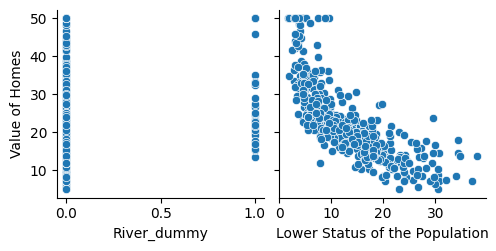

In [4]:
sns.pairplot(df, diag_kind='kde', markers='o', x_vars=['River_dummy', 'Lower Status of the Population'], y_vars=['Value of Homes'])

Task 3: Data Preprocessing
 Select the 'land zoned' as (X) and 'Value of Homes' as the target (y).

In [53]:
X = df['land zoned']
y = df['Value of Homes']


3.1 Split data into training and test sets (80%/20%).

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Task 4: Manual Calculation of β₀ and β₁ (Using 'land zoned' only)

Calculate β₀(intercept) and β₁(slope) manually using the formulas for simple linear regression.



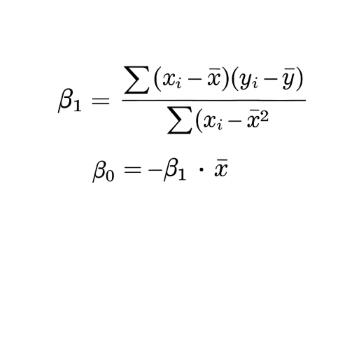

Hint:

 - compute the mean of the feature (x_mean) and the target (y_mean).

 - Then use the formulas.

 - plug these into the simple regression equation.

In [76]:
X_mean = np.mean(X)
y_mean = np.mean(y)

numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean)**2)

# Step 3: calculate beta1 and beta0
beta_1 = numerator / denominator
beta_0 = y_mean - beta_1 * X_mean

print("Beta 1 (slope):", beta_1)
print("Beta 0 (intercept):", beta_0)

Beta 1 (slope): 0.14213999415535436
Beta 0 (intercept): 20.917579117799832


Beta 1 (slope): 0.09810926618810711
Beta 0 (intercept): 21.68165662860049


 Task 5: Train Linear Regression Model

 Create and train a Linear Regression model using sklearn.

  Hint: Use .fit()

In [77]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)


LinearRegression()

5.2 Print the Intercept and coefficients

Hint : Use .intercept_ and .coef_

In [55]:
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 21.353233067252766
Slope: 0.12475264031448047


Task 6: Make Predictions

Use the trained model to predict the prices of the test data.

Hint: Use .predict()

In [ ]:
y_pred = model.predict(X_test.values.reshape(-1, 1))

Task 7: Evaluate the Model

Evaluate the performance of the model using Mean Squared Error ,Root quared Error  and R² score.

In [41]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R-squared:", R2)

Mean Squared Error: 54.34745382306917
Root Mean Squared Error: 7.372072559536373
R-squared: 0.25890290285100526


Task 8: Visualize Results

Create a scatter plot comparing actual vs. Land Zoned house prices and add the best-fit line (regression line).

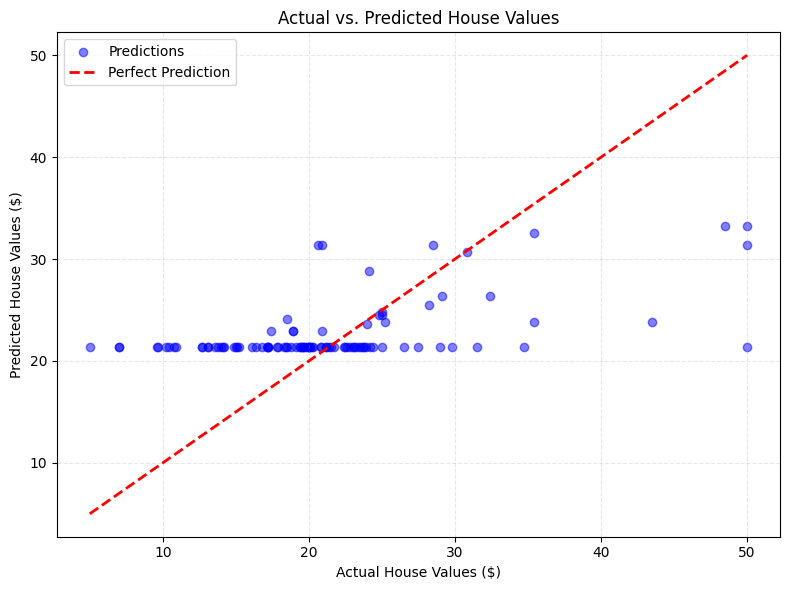

In [ ]:
# Plot 1: Actual Prices vs. Land Zoned (with regression line)
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Prices')

# Regression line (using the trained model)
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Regression Line')

plt.xlabel('Land Zoned')
plt.ylabel('Actual House Prices ($)')
plt.title('House Prices vs. Land Zoned (Test Data)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# <h1><font color='red'> Part2: Multiple Linear Regression</font></h1>


---



Task1: Data Preprocessing

 Select  all the features as (X) and 'Value of Homes' as the target (y).

In [22]:

X = df.drop(columns=['Value of Homes'])
y = df['Value of Homes']



Task2:

Split data into training and test sets (80%/20%).

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)



(404, 12)
(404,)


Task 3: Train Linear Regression Model

 Create and train a Linear Regression model using sklearn.

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Task 4: Make Predictions

Use the trained model to predict the prices of the test data.

In [30]:
y_pred = model.predict(X_test)

Print the Intercept and coefficients


In [31]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 17.94164144427709
Coefficients: [-0.10378849  0.03457988 -0.03375854  2.4688605   4.58465619 -0.02041385
 -1.20135165  0.2275268  -0.01233988 -0.71347374  0.01302048 -0.53551391]


Task 5: Evaluate the Model

Evaluate the performance of the model using Mean Squared Error ,Root quared Error  and R² score.

In [33]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 25.348503470941406
Root Mean Squared Error: 5.034729731667968
R-squared: 0.6543407093082285


Task 6: Visualize Results

Create a scatter plot comparing actual vs. predicted house prices and add the best-fit line (regression line).

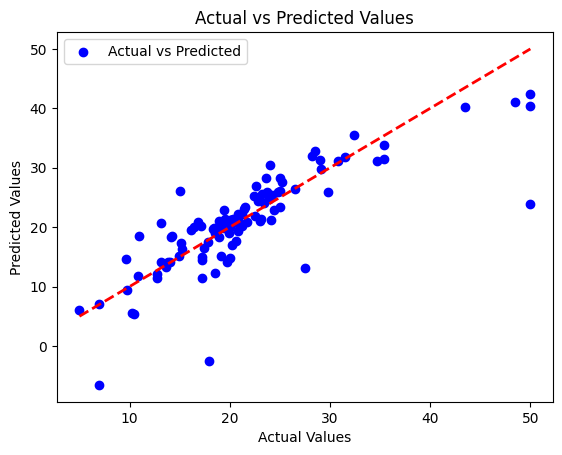

In [34]:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.legend()
plt.show()


# <h1><font color='red'> Part3 : Report </font></h1>



- Discuss the plot(relationship between the actual and predicted value).

- Make a comparison between the intercept and coefficients for simple and multiple regression.


